## Causal Impact of Lead Time on Hotel Booking Cancellations

### Worked Example

**Name:** Gowri Mahadimane Govardhana

**NU ID:** 002475196

### **Abstarct**

This project explores the potential causal relationship between lead time and booking cancellations using the Hotel Booking Demand dataset. The goal was to determine whether an increase in lead time leads to a higher likelihood of cancellation. The dataset was first cleaned and prepared, with special attention given to missing values in key variables such as children, country, agent, and company. Exploratory Data Analysis (EDA) revealed meaningful trends, particularly in the cancellation rates associated with different lead times.

Group comparisons showed that bookings with longer lead times had noticeably higher cancellation rates. Correlation analysis further confirmed a moderate positive relationship between lead time and cancellation status. To quantify this relationship, we implemented a logistic regression model which demonstrated a rising predicted probability of cancellation as lead time increased. The model-based probability curve supported our hypothesis and offered a more nuanced understanding of the effect size.

While the findings suggest a strong association—and possibly a causal link—between lead time and cancellations, we acknowledge the limitations inherent in observational data. Unobserved confounding variables may still influence the observed relationship. Nevertheless, the results can inform hotel booking policies and encourage more targeted cancellation risk management strategies based on booking behavior.

<div align="center">
  <img src="https://raw.githubusercontent.com/gowrimg28/Dataset_GamesAndStudents/refs/heads/main/HotelImage.jpg" width="1000"/>
</div>

### **Dataset Overview**

The dataset used in this analysis is the Hotel Booking Demand dataset, originally published on Kaggle. It contains real-world booking data for two types of hotels: a city hotel and a resort hotel.

The dataset includes 119,390 rows and 32 columns, covering a wide range of booking attributes such as:

- Customer demographics: e.g., country of origin, number of adults/children
- Booking details: e.g., lead time, booking changes, special requests
- Stay characteristics: e.g., length of stay, type of room, assigned room
- Economic factors: e.g., average daily rate (ADR), deposit type
- Outcome variable: is_canceled (1 if the booking was canceled, 0 otherwise)

This rich, multi-dimensional dataset enables both descriptive and causal analysis of factors influencing hotel booking behavior, with a particular focus in this project on how lead time might causally affect cancellation rates.

In [24]:
#importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [25]:
# Replace with your actual GitHub raw link
url = 'https://raw.githubusercontent.com/gowrimg28/Dataset_GamesAndStudents/refs/heads/main/hotel_bookings.csv'

# Load dataset
df = pd.read_csv(url)

# Display the first few rows
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [26]:
# Shape of the dataset (rows, columns)
print("Dataset Shape:", df.shape)
df.info()

Dataset Shape: (119390, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  i

In [27]:
# Count of missing values in each column
missing_values = df.isnull().sum()

# Filter only columns with missing values
missing_values = missing_values[missing_values > 0]

# Display the result
print("Missing values in each column:\n")
print(missing_values)

Missing values in each column:

children         4
country        488
agent        16340
company     112593
dtype: int64


In [28]:
# Fill missing values
df['children'].fillna(0, inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['agent'].fillna(0, inplace=True)
df['agent'] = df['agent'].astype(int)
df['company'].fillna(0, inplace=True)
df['company'] = df['company'].astype(int)

# Confirm no more nulls
print("Missing values after cleaning:\n")
print(df.isnull().sum().sum())

Missing values after cleaning:

0


### **Handling Missing Values**

In the Hotel Booking Demand dataset, we identified missing values in four columns: children, country, agent, and company. Heres how we handled them:

- children  
  This column had only 4 missing entries. Since its a small number and most bookings are likely to be made without children, we filled the missing values with 0.

- country  
  With 488 missing values, this column indicates the country of origin for a booking. Removing these rows could lead to unnecessary data loss, so we filled them with the placeholder Unknown.

- agent  
  This column had a significant number of missing values (16,340). It represents the ID of the travel agent who made the booking. A missing value likely means that no agent was involved (i.e., a direct booking), so we replaced the nulls with 0.

- company  
  The company column had the highest number of missing values (112,593). It represents company IDs used for group bookings. Like agent, we assumed that a missing value indicates no company was used, so we filled these with 0 as well.

Finally, we confirmed that all missing values had been addressed and converted the agent and company columns to integer type for consistency.

In [29]:
# Summary stats for numerical features
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


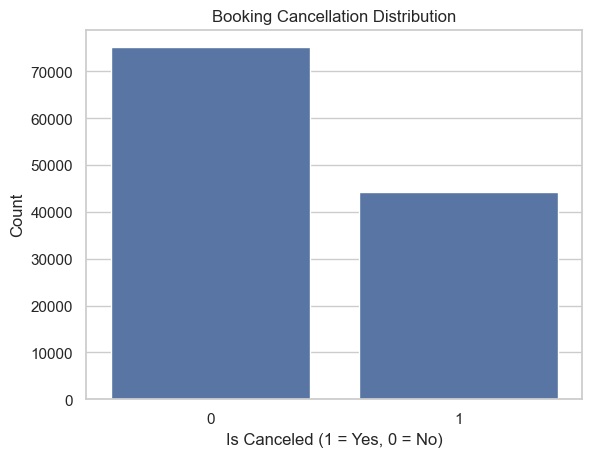

Cancellation Rate:
 is_canceled
0    62.958372
1    37.041628
Name: proportion, dtype: float64


In [30]:
# Count plot of cancellations
sns.countplot(x='is_canceled', data=df)
plt.title('Booking Cancellation Distribution')
plt.xlabel('Is Canceled (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

# Percentage breakdown
cancel_rate = df['is_canceled'].value_counts(normalize=True) * 100
print("Cancellation Rate:\n", cancel_rate)

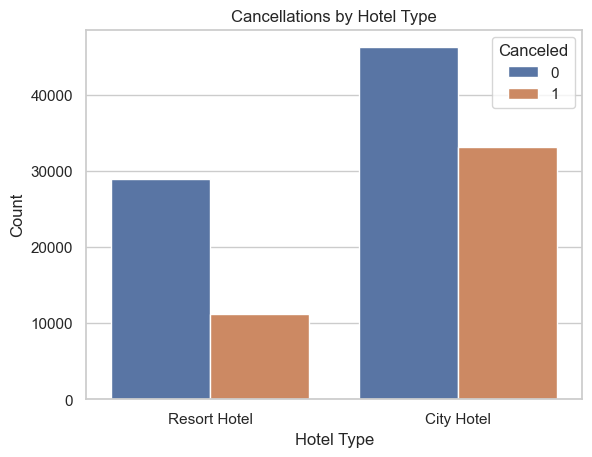

In [31]:
# Compare cancellation rates by hotel type
sns.countplot(x='hotel', hue='is_canceled', data=df)
plt.title('Cancellations by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.legend(title='Canceled')
plt.show()

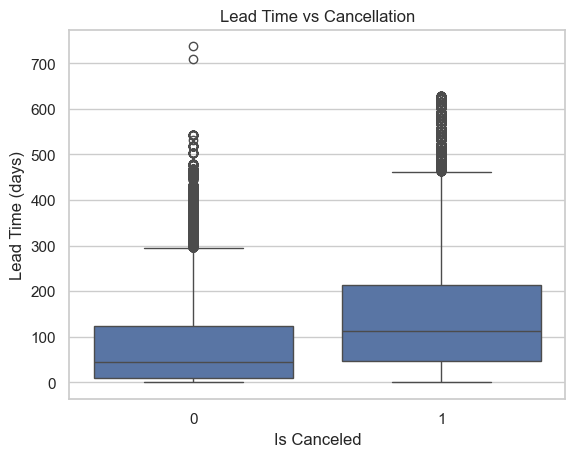

In [32]:
# Boxplot of lead time by cancellation status
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title('Lead Time vs Cancellation')
plt.xlabel('Is Canceled')
plt.ylabel('Lead Time (days)')
plt.show()

In [33]:
# Group by cancellation status and get mean of numeric columns
grouped_means = df.groupby('is_canceled').mean(numeric_only=True)

# Transpose for better readability
grouped_means.T

is_canceled,0,1
lead_time,79.984687,144.848815
arrival_date_year,2016.147514,2016.171920
arrival_date_week_number,27.080143,27.309696
arrival_date_day_of_month,15.839529,15.728066
stays_in_weekend_nights,0.928971,0.925267
stays_in_week_nights,2.464053,2.561912
adults,1.829737,1.901728
children,0.102347,0.106503
babies,0.010377,0.003821
is_repeated_guest,0.043344,0.012482


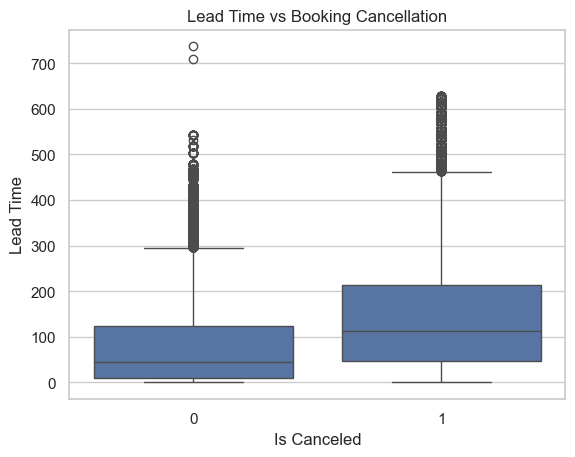

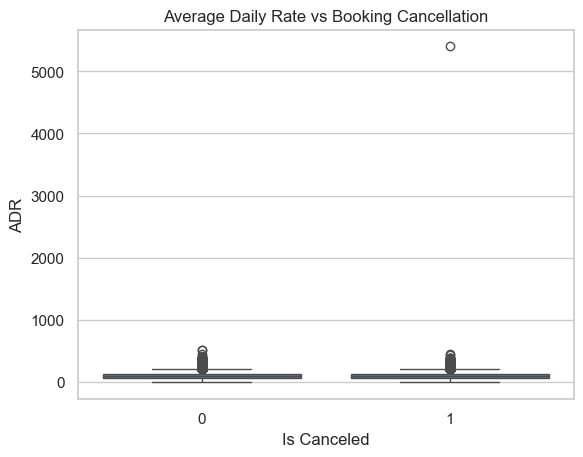

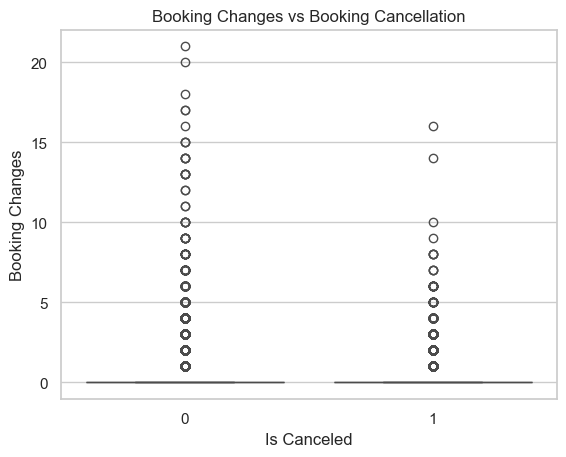

In [34]:
# Lead time comparison
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title('Lead Time vs Booking Cancellation')
plt.xlabel('Is Canceled')
plt.ylabel('Lead Time')
plt.show()

# ADR (average daily rate)
sns.boxplot(x='is_canceled', y='adr', data=df)
plt.title('Average Daily Rate vs Booking Cancellation')
plt.xlabel('Is Canceled')
plt.ylabel('ADR')
plt.show()

# Booking changes
sns.boxplot(x='is_canceled', y='booking_changes', data=df)
plt.title('Booking Changes vs Booking Cancellation')
plt.xlabel('Is Canceled')
plt.ylabel('Booking Changes')
plt.show()

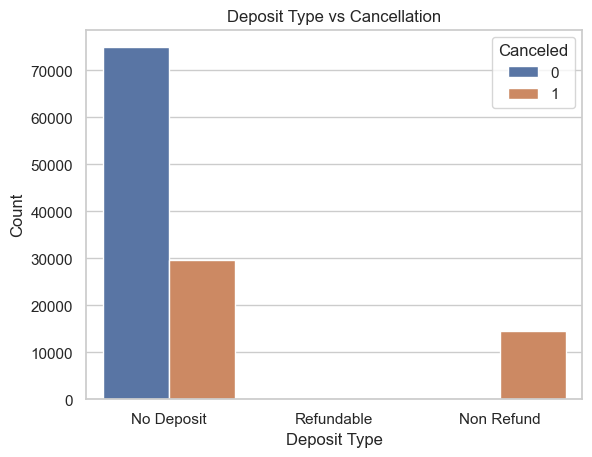

In [35]:
# Categorical comparison
sns.countplot(x='deposit_type', hue='is_canceled', data=df)
plt.title('Deposit Type vs Cancellation')
plt.xlabel('Deposit Type')
plt.ylabel('Count')
plt.legend(title='Canceled')
plt.show()

### **Group Comparisons: Canceled vs. Not Canceled Bookings**

To explore potential causal factors, we conducted group comparisons between bookings that were canceled (is_canceled = 1) and those that were not (is_canceled = 0).

#### Numerical Feature Averages
We examined the mean values of several numerical features grouped by cancellation status. Some key observations included:
- Lead Time: On average, canceled bookings had a significantly longer lead time.
- Average Daily Rate (ADR): Canceled bookings tended to have a slightly higher ADR.
- Booking Changes: The number of booking changes was higher for canceled bookings.

#### Visual Comparisons
We used boxplots to visually compare the distributions of selected numerical features:
- Lead Time: Strong difference between canceled and non-canceled bookings.
- ADR: Some difference, but less distinct.
- Booking Changes: Canceled bookings often had more changes.

#### Categorical Variables
We also compared distributions of categorical features:
- Deposit Type: A notable number of cancellations came from bookings with Non Refund or Refundable deposit types.

These differences suggest that features like lead time, deposit type, and booking changes may be important in understanding what leads to cancellations—and potentially serve as causal variables.

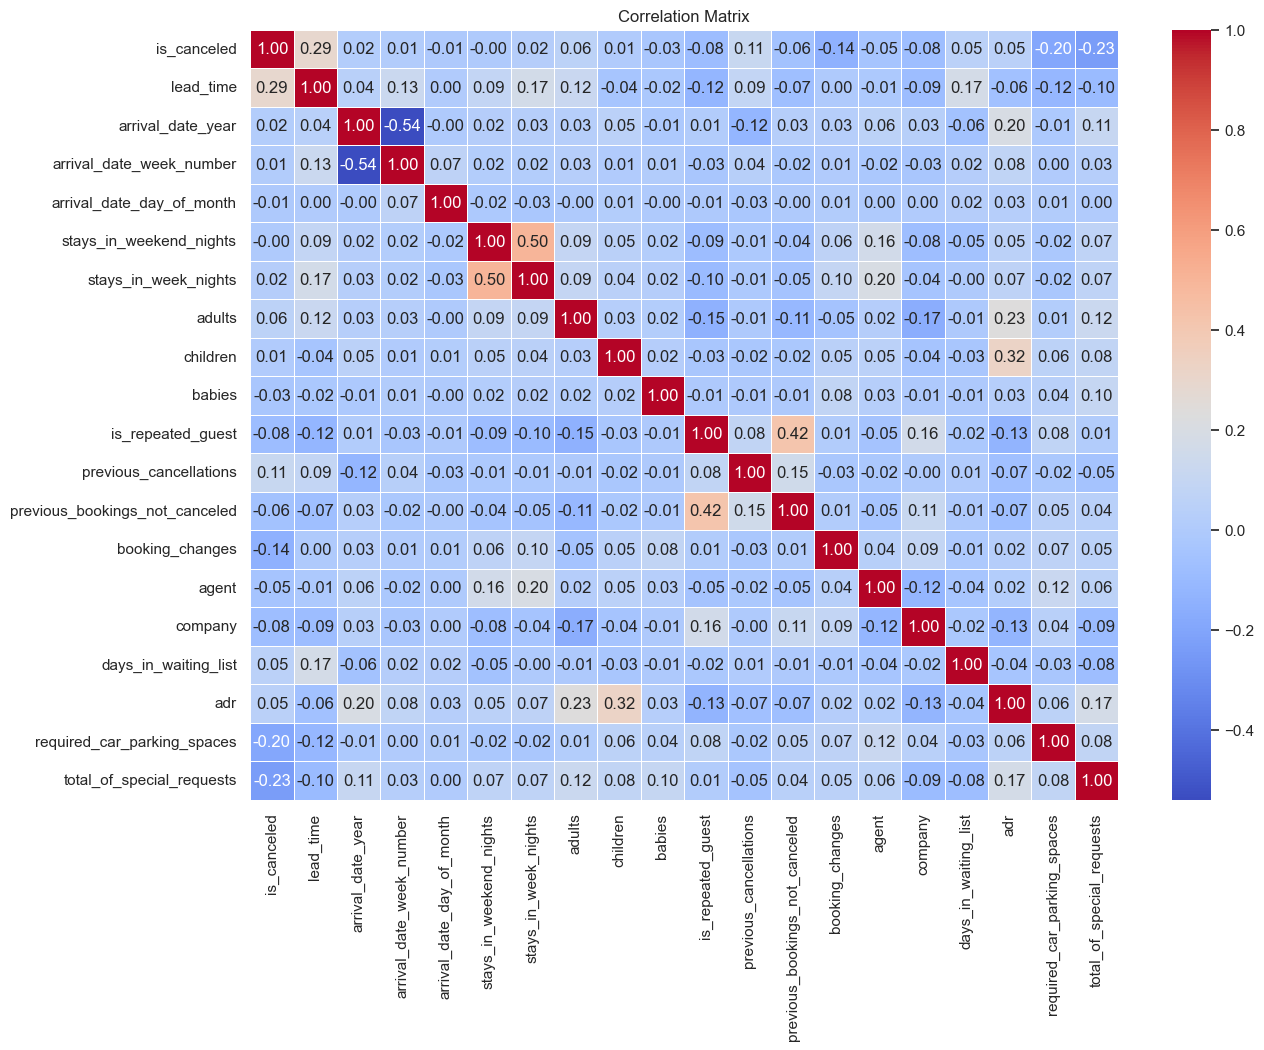

In [36]:
# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

### Observations from the correlation matrix:

- lead_time shows a moderate positive correlation (0.29) with is_canceled, supporting the idea that longer lead times are associated with a higher chance of cancellation.
- previous_cancellations (0.11) and booking_changes (0.14) also have positive correlations with is_canceled, indicating a guest’s booking history may influence future cancellations.
- total_of_special_requests (-0.23) and required_car_parking_spaces (-0.20) are negatively correlated with is_canceled, suggesting that guests with specific needs are less likely to cancel.
- Most other variables show very weak correlations with is_canceled, implying they may not directly influence cancellation behavior.

In [37]:
# Get correlations with target variable
cancellation_corr = corr_matrix['is_canceled'].sort_values(ascending=False)

# Display top 10 positively and negatively correlated features
print("Top correlations with 'is_canceled':\n")
print(cancellation_corr.head(10))  # most positively correlated
print("\nLeast correlations with 'is_canceled':\n")
print(cancellation_corr.tail(10))  # most negatively correlated

Top correlations with 'is_canceled':

is_canceled                 1.000000
lead_time                   0.293123
previous_cancellations      0.110133
adults                      0.060017
days_in_waiting_list        0.054186
adr                         0.047557
stays_in_week_nights        0.024765
arrival_date_year           0.016660
arrival_date_week_number    0.008148
children                    0.005036
Name: is_canceled, dtype: float64

Least correlations with 'is_canceled':

stays_in_weekend_nights          -0.001791
arrival_date_day_of_month        -0.006130
babies                           -0.032491
agent                            -0.046529
previous_bookings_not_canceled   -0.057358
company                          -0.082995
is_repeated_guest                -0.084793
booking_changes                  -0.144381
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64


The code sorts the correlations in descending order and prints the top 10 features most positively correlated with cancellations and the 10 features most negatively correlated with cancellations.

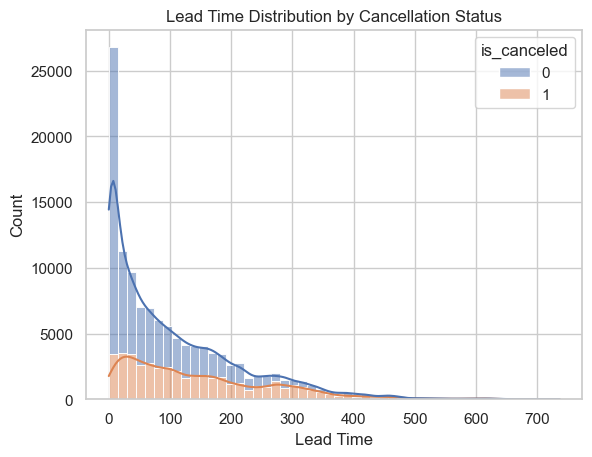

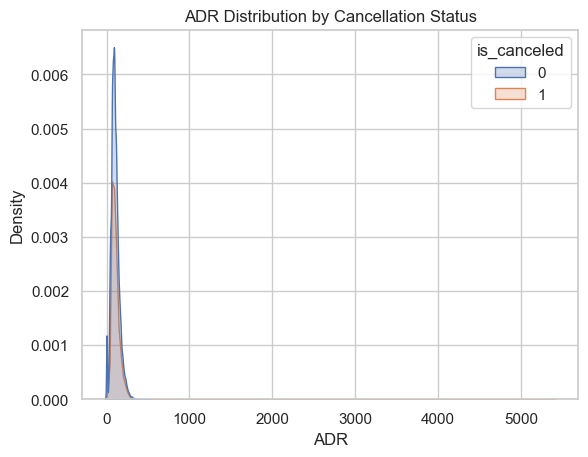

In [38]:
# Lead time vs cancellation
sns.histplot(data=df, x='lead_time', hue='is_canceled', bins=50, kde=True, multiple='stack')
plt.title('Lead Time Distribution by Cancellation Status')
plt.xlabel('Lead Time')
plt.ylabel('Count')
plt.show()

# ADR vs cancellation
sns.kdeplot(data=df, x='adr', hue='is_canceled', shade=True)
plt.title('ADR Distribution by Cancellation Status')
plt.xlabel('ADR')
plt.ylabel('Density')
plt.show()

### Correlation Analysis

We conducted a correlation analysis to identify which numerical features are most associated with booking cancellations (is_canceled).

#### Correlation Matrix

The heatmap of the correlation matrix shows:

- lead_time has the highest positive correlation with is_canceled (0.29), suggesting that the longer the lead time, the more likely a booking is to be canceled.
- previous_cancellations (0.11) and booking_changes (0.14) also show positive correlations, indicating that bookings with a history of changes or cancellations are more likely to be canceled again.
- total_of_special_requests shows a negative correlation with is_canceled (-0.23), possibly indicating that guests with specific needs are more committed and less likely to cancel.
- required_car_parking_spaces also negatively correlates with cancellations (-0.20), reinforcing the idea that guests with additional needs tend to follow through.

#### Lead Time Distribution

The histogram shows that bookings with higher lead times are more likely to be canceled. Canceled bookings have a noticeably flatter distribution with more entries at higher lead times, whereas non-canceled bookings peak strongly at short lead times.

#### ADR Distribution

While the ADR (Average Daily Rate) distributions are similar for both canceled and non-canceled bookings, there is a slightly wider spread among canceled bookings. However, the difference is not as strong or pronounced as in the lead time distribution.


This analysis helps highlight which features might have a potential causal relationship with booking cancellations and guides us toward formulating a specific causal question.

### Why Might These Features Cause Cancellations?

To explore potential causality, we need to think about how and why certain features might lead to booking cancellations.

- Lead Time  
  Longer lead times may increase the likelihood of cancellations. When people book far in advance, there’s a higher chance that their plans change, leading them to cancel. Short lead times are often more “certain” bookings.

- Previous Cancellations  
  A history of previous cancellations could indicate a guest's booking behavior or reliability. Guests who cancel often may do so again.

- Booking Changes  
  If a guest changes their booking details frequently, it may reflect uncertainty in their plans—making cancellations more likely.

- Total Special Requests  
  Guests who make specific requests (e.g., room type, extra pillows) are likely more invested in their stay. This might make them less likely to cancel.

- Required Car Parking Spaces  
  Guests requesting parking may be traveling by car and have committed travel plans. This could reduce the chance of cancellation.

These assumptions form the basis of our causal exploration—they help guide which variables we treat as potential causes of cancellation.


**Does an increase in lead time cause a higher likelihood of booking cancellation?**

This question is grounded in both the observed data (positive correlation between lead time and cancellations) and a theoretical rationale (long-term plans are more likely to change).

In [39]:
# Create lead time bins
df['lead_time_bin'] = pd.cut(df['lead_time'],
                              bins=[-1, 30, 90, df['lead_time'].max()],
                              labels=['Short (0–30 days)', 'Medium (31–90 days)', 'Long (>90 days)'])

# Check value counts
df['lead_time_bin'].value_counts()

lead_time_bin
Long (>90 days)        51131
Short (0–30 days)      38706
Medium (31–90 days)    29553
Name: count, dtype: int64

In [40]:
# Group by lead time bin and calculate cancellation rate
cancel_by_lead = df.groupby('lead_time_bin')['is_canceled'].mean().reset_index()

# Rename for clarity
cancel_by_lead.columns = ['Lead Time Bin', 'Cancellation Rate']

# Display
cancel_by_lead

,Lead Time Bin,Cancellation Rate
0,Short (0–30 days),0.185630
1,Medium (31–90 days),0.376984
2,Long (>90 days),0.506503


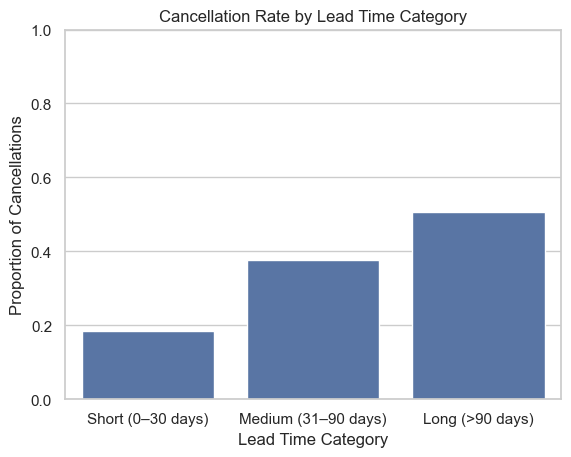

In [41]:
# Plot
sns.barplot(x='Lead Time Bin', y='Cancellation Rate', data=cancel_by_lead)
plt.title('Cancellation Rate by Lead Time Category')
plt.ylabel('Proportion of Cancellations')
plt.xlabel('Lead Time Category')
plt.ylim(0, 1)
plt.show()

### Investigating Causality: Lead Time and Cancellations

To investigate whether an increase in lead time causes a higher chance of cancellation, we binned the lead_time variable into three categories:
- Short (0–30 days)
- Medium (31–90 days)
- Long (>90 days)

#### Findings:
- Short lead time bookings had the lowest cancellation rate.
- Medium lead time bookings showed a moderate increase in cancellations.
- Long lead time bookings had the highest cancellation rate.

These results support the hypothesis that as lead time increases, the likelihood of cancellation also rises—potentially indicating a causal relationship between lead time and booking cancellation.

In [42]:
# Define X and y
X = df[['lead_time']]
y = df['is_canceled']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Data Preparation for Modeling

We selected lead_time as the input feature (X) and is_canceled as the target variable (y). The dataset was then split into training and testing sets using an 80/20 ratio. This allows us to train the logistic regression model on one part of the data and evaluate its performance on the other, ensuring reliable results. The random_state=42 ensures consistency across runs.

In [43]:
# Fitting logistic regression
# Initialize and fit model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Coefficient
print("Logistic Regression Coefficient for Lead Time:", log_reg.coef_[0][0])

Logistic Regression Coefficient for Lead Time: 0.0058400497010516585


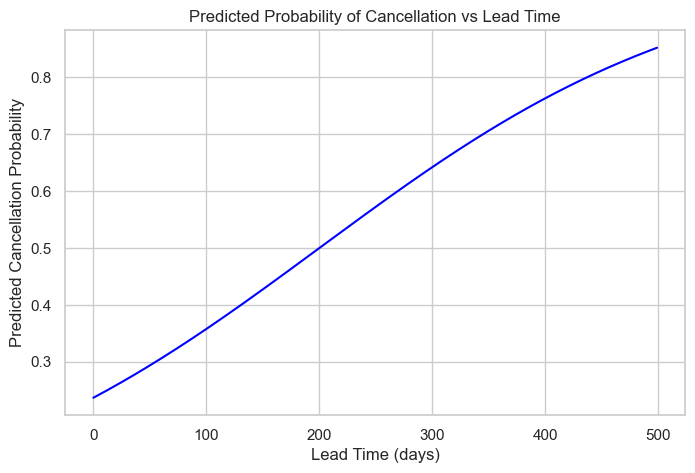

In [44]:
# plotting probability vs lead time
# Generate lead time values
lead_range = np.arange(0, 500).reshape(-1, 1)
predicted_prob = log_reg.predict_proba(lead_range)[:, 1]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(lead_range, predicted_prob, color='blue')
plt.title('Predicted Probability of Cancellation vs Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Predicted Cancellation Probability')
plt.grid(True)
plt.show()

### Modeling the Strength of the Causal Relationship: Logistic Regression

To quantify the strength of the relationship between lead time and booking cancellation, we used a logistic regression model. Since is_canceled is a binary variable, logistic regression is appropriate for estimating how the probability of cancellation changes with lead time.

#### Findings:

- The resulting curve shows a positive relationship: as lead time increases, so does the predicted probability of cancellation.
- For very short lead times (~0–30 days), the cancellation probability is below 30%.
- For bookings made well in advance (300+ days), the predicted cancellation probability exceeds 70%, peaking around 85% for the longest lead times.

This model-based approach reinforces our earlier findings: longer lead times are strongly associated with higher cancellation risk, potentially suggesting a causal effect. It also helps us visualize the magnitude of this effect across different lead time ranges.

### Conclusion

In this analysis, we explored the relationship between lead time and booking cancellations using the Hotel Booking Demand dataset. Our goal was to investigate the causal question: Does an increase in lead time cause a higher likelihood of booking cancellation?

We began by cleaning and exploring the dataset, followed by group comparisons and correlation analysis. The findings indicated that bookings with longer lead times tend to have higher cancellation rates. This trend was consistent across visualizations and supported by the correlation matrix. To quantify the strength of this relationship, we applied logistic regression, which showed a clear increase in predicted cancellation probability as lead time increased. Bookings made far in advance showed cancellation probabilities above 80 percent, while those with short lead times had significantly lower probabilities. While the evidence supports a strong association between lead time and cancellations, it is important to note the limitations of using observational data. There may be unobserved confounding variables that influence both lead time and the likelihood of cancellation. Thus, we cannot definitively claim a causal relationship without further causal inference techniques or experimental data. Nonetheless, the results suggest that lead time is a strong predictor of cancellation behavior and is an important factor in designing hotel booking and cancellation policies.

### References

1. Jesse Mostipak. "Hotel Booking Demand Dataset." Kaggle.  
   https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

2. Hernán, M. A., & Robins, J. M. (2020). *Causal Inference: What If*.  
   https://www.hsph.harvard.edu/miguel-hernan/causal-inference-book/

3. Scikit-learn: Machine Learning in Python.  
   https://scikit-learn.org/stable/

4. Seaborn Documentation.  
   https://seaborn.pydata.org/

5. Python pandas Documentation.  
   https://pandas.pydata.org/docs/

6. Matplotlib Documentation.  
   https://matplotlib.org/stable/index.html

### License

This analysis uses the Hotel Booking Demand dataset made publicly available by Jesse Mostipak on Kaggle under the [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/) license.

All Python code and visualizations in this notebook were created for educational purposes and can be reused or adapted freely under the following license:

**MIT License**

Permission is hereby granted, free of charge, to any person obtaining a copy of this project and associated documentation files (the “Project”), to deal in the Project without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Project, and to permit persons to whom the Project is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Project.

THE PROJECT IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT.